In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
def data_loader(train_batch_size, test_batch_size):
    train_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size = train_batch_size, shuffle=True)

    test_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size = test_batch_size, shuffle=True)

    return (train_data, test_data)

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        self.c1 = nn.Conv2d(1, 6, 5)
        self.c2 = nn.Conv2d(6, 16, 5)
        self.l1 = nn.Linear(16 * 5 * 5, 120)
        self.l2 = nn.Linear(120, 84)
        self.l3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.c1(x)), 2)
        x = F.max_pool2d(F.relu(self.c2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))

        x = self.l3(x)
        return x

In [ ]:
def calculate_parameters(modelName, model):
    param = sum(p.numel() for p in model.parameters())
    print('{}: {}'.format(modelName, param))
    return param

In [ ]:
def init_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)

In [ ]:
def train(model, optimizer, data):
    model.train()
    for batch_idx, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        output = model(data)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [ ]:
def calculate_ip_op_diff(model, loader):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    loss_fn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [ ]:
epochs=28

def train_models(model, optimizer, train_data, test_data):
    param_arr = []
    train_loss_arr = []
    test_loss_arr = []
    train_accuracy_arr = []
    test_accuracy_arr = []
    total_train_loss = 0
    print('Training model ')
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_data)
        train_loss, train_acc = calculate_ip_op_diff(model, train_data)
        test_loss, test_acc = calculate_ip_op_diff(model, test_data)

        train_loss_arr.append(train_loss)
        test_loss_arr.append(test_loss)
        train_accuracy_arr.append(train_acc)
        test_accuracy_arr.append(test_acc)
#         param_arr.append(calculate_parameters('Model params',  model))
        print('test loss - ', test_loss, ' epoch - ', epoch)
    print('Training completed..')
    return train_loss_arr, test_loss_arr, train_accuracy_arr, test_accuracy_arr, param_arr

In [ ]:
train_data, test_data = data_loader(75, 75)

model_1 = Model()
optimizer = init_optimizer(model_1)
train_loss_arr_b1, test_loss_arr_b1, train_accuracy_arr_b1, test_accuracy_arr_b1, param_arr_b1 = train_models(model_1, optimizer, train_data, test_data)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 13329081.54it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 483286.23it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4437408.14it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3224530.94it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Training model 
test loss -  tensor(0.0806)  epoch -  1
test loss -  tensor(0.0635)  epoch -  2
test loss -  tensor(0.0622)  epoch -  3
test loss -  tensor(0.0404)  epoch -  4
test loss -  tensor(0.0559)  epoch -  5
test loss -  tensor(0.0423)  epoch -  6
test loss -  tensor(0.0421)  epoch -  7
test loss -  tensor(0.0365)  epoch -  8
test loss -  tensor(0.0329)  epoch -  9
test loss -  tensor(0.0380)  epoch -  10
test loss -  tensor(0.0365)  epoch -  11
test loss -  tensor(0.0326)  epoch -  12
test loss -  tensor(0.0336)  epoch -  13
test loss -  tensor(0.0403)  epoch -  14
test loss -  tensor(0.0337)  epoch -  15
test loss -  tensor(0.0412)  epoch -  16
test loss -  tensor(0.0374)  epoch -  17
test loss -  tensor(0.0446)  epoch -  18
test loss -  tensor(0.0523)  epoch -  19
test loss -  tensor(0.0415)  epoch -  20
test loss -  tensor(0.0381)  epoch -  21
test loss -  tensor(0.0456)  epoch -  22
test loss -  tensor(

In [ ]:
train_data, test_data = data_loader(500, 500)

model_2 = Model()
optimizer = init_optimizer(model_2)
train_loss_arr_b2, test_loss_arr_b2, train_accuracy_arr_b2, test_accuracy_arr_b2, param_arr_b2 = train_models(model_2, optimizer, train_data, test_data)

Training model 
test loss -  tensor(2.2174)  epoch -  1
test loss -  tensor(0.3055)  epoch -  2
test loss -  tensor(0.1672)  epoch -  3
test loss -  tensor(0.1113)  epoch -  4
test loss -  tensor(0.0890)  epoch -  5
test loss -  tensor(0.0776)  epoch -  6
test loss -  tensor(0.0657)  epoch -  7
test loss -  tensor(0.0660)  epoch -  8
test loss -  tensor(0.0537)  epoch -  9
test loss -  tensor(0.0593)  epoch -  10
test loss -  tensor(0.0539)  epoch -  11
test loss -  tensor(0.0484)  epoch -  12
test loss -  tensor(0.0447)  epoch -  13
test loss -  tensor(0.0469)  epoch -  14
test loss -  tensor(0.0433)  epoch -  15
test loss -  tensor(0.0380)  epoch -  16
test loss -  tensor(0.0389)  epoch -  17
test loss -  tensor(0.0364)  epoch -  18
test loss -  tensor(0.0374)  epoch -  19
test loss -  tensor(0.0382)  epoch -  20
test loss -  tensor(0.0373)  epoch -  21
test loss -  tensor(0.0346)  epoch -  22
test loss -  tensor(0.0370)  epoch -  23
test loss -  tensor(0.0364)  epoch -  24
test loss

In [ ]:
param_b1 = torch.nn.utils.parameters_to_vector(model_1.parameters())
param_b2 = torch.nn.utils.parameters_to_vector(model_2.parameters())

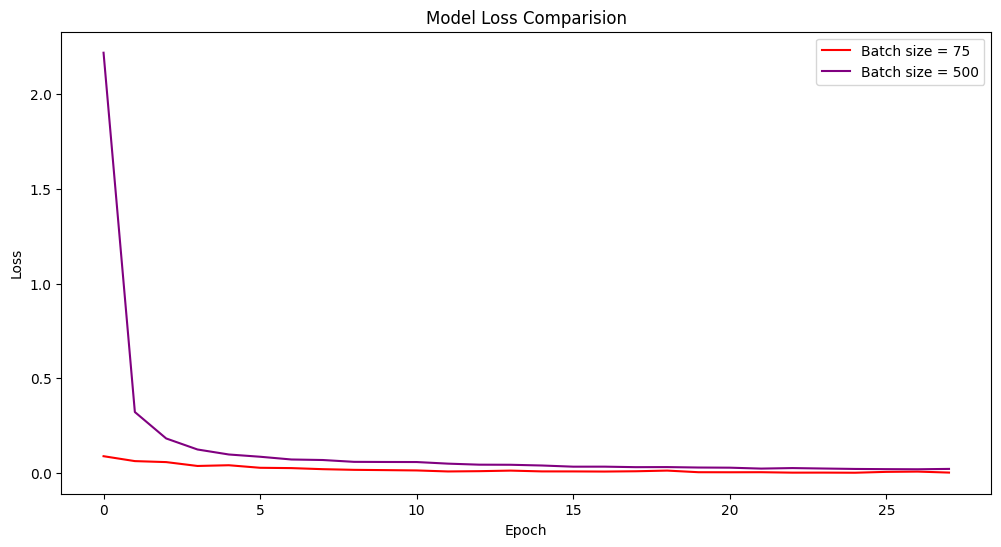

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), train_loss_arr_b1, color = "red")
plt.plot(np.arange(0, 28, 1), train_loss_arr_b2, color = "purple")
plt.title('Model Loss Comparision')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

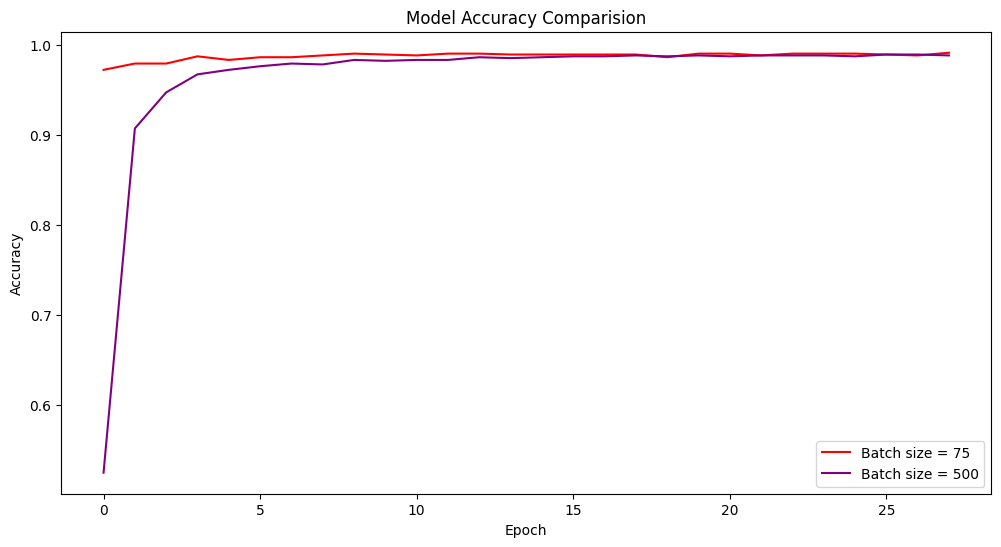

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b1, color = "red")
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b2, color = "purple")
plt.title('Model Accuracy Comparision')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#alpha是一个范围从-2到2的插值比率，在这个过程中，使用了两个模型的参数param_b1（从model_1训练得到）和param_b2（从model_2训练得到），并通过公式 theta = (1 - alpha[i]) * param_b1 + alpha[i] * param_b2 来生成插值后的参数集theta。
alpha = np.arange(-2, 2, 0.2)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*param_b1 + alpha[i]* param_b2
    thetaArr.append(theta)

In [ ]:
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

for i in range (len(thetaArr)):
#     torch.manual_seed(1)
    print('Running for theta - ' , i)
    theta = (1-alpha[i])* param_b1 + alpha[i]*param_b2
    model = Model()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_ip_op_diff(model, train_data)
    alpha_test_loss, alpha_test_acc = calculate_ip_op_diff(model, test_data)
    print('Alpha loss - ' , alpha_test_loss)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

Running for theta -  0
Alpha loss -  tensor(39.5652)
Running for theta -  1
Alpha loss -  tensor(25.7505)
Running for theta -  2
Alpha loss -  tensor(16.1420)
Running for theta -  3
Alpha loss -  tensor(9.6904)
Running for theta -  4
Alpha loss -  tensor(5.5222)
Running for theta -  5
Alpha loss -  tensor(2.9437)
Running for theta -  6
Alpha loss -  tensor(1.4525)
Running for theta -  7
Alpha loss -  tensor(0.6596)
Running for theta -  8
Alpha loss -  tensor(0.2770)
Running for theta -  9
Alpha loss -  tensor(0.1071)
Running for theta -  10
Alpha loss -  tensor(0.0445)
Running for theta -  11
Alpha loss -  tensor(0.0461)
Running for theta -  12
Alpha loss -  tensor(0.8951)
Running for theta -  13
Alpha loss -  tensor(1.7009)
Running for theta -  14
Alpha loss -  tensor(0.2800)
Running for theta -  15
Alpha loss -  tensor(0.0362)
Running for theta -  16
Alpha loss -  tensor(0.1064)
Running for theta -  17
Alpha loss -  tensor(0.9290)
Running for theta -  18
Alpha loss -  tensor(4.6946)


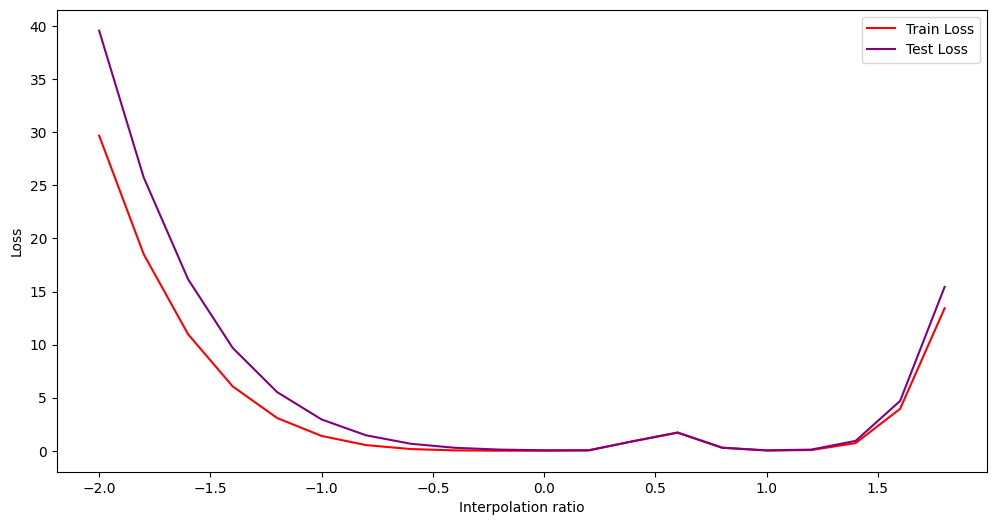

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_train_loss_arr, color = "red")
plt.plot(alpha, alpha_test_loss_arr, color = "purple")
plt.xlabel('Interpolation ratio')
plt.ylabel('Loss')
plt.legend(['Train Loss' , 'Test Loss'])

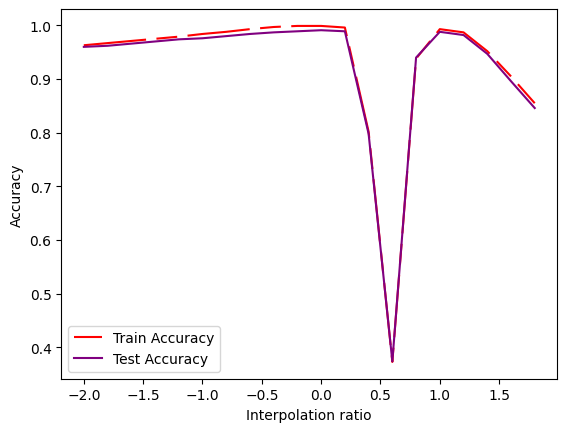

In [ ]:
plt.plot(alpha, alpha_train_acc_arr, dashes=[30, 5, 10, 5], color = "red")
plt.plot(alpha, alpha_test_acc_arr, color = "purple")
plt.xlabel('Interpolation ratio')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy' , 'Test Accuracy'])